In [283]:
import figure_functions
%reset -f
%load_ext autoreload
%autoreload 2

import sys
import os

sys.path.append(os.path.join(os.path.pardir, 'code'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pickle
import scipy

import pynumdiff
import figurefirst as fifi
import figure_functions as ff

from process_trajectory import Trajectory, run_process

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load & process fly dataset

In [284]:
# Raw data files
data_dir = os.path.join(os.path.pardir, 'data')

In [285]:
data_name = 'laminar_orco_flash'
data_path = os.path.join(data_dir, data_name + '.csv')
data_path

'..\\data\\laminar_orco_flash.csv'

# Run

In [286]:
# Mass & drag properties
mass = 0.25e-6
props = {'mass': mass,  # mass [kg]
        'inertia': 5.2e-13,  # [N*m*s^2] yaw mass moment of inertia: 10.1242/jeb.02369
        'drag': mass / 0.170,  # [N*s/m] calculate using the mass and time constant: 10.1242/jeb.098665
        'ambient_wind_speed': 0.4,  # [m/s] ambient wind speed
        'ambient_wind_direction': np.pi}  # [rad] ambient wind direction

In [287]:
# Process
DATA, processed_traj = run_process(data_path, props, g_thresh_high=1.5, g_thresh_low=0.1, time_thresh=(-0.1, 4.0))

Loading: ..\data\laminar_orco_flash.csv
231 trajectories
Full intensity pulse: 231
Half intensity pulse: 0
Control: 0

Rejecting:
time-end: 0, time-end: 8, time-end: 10, time-end: 11, time-end: 13, time-end: 15, time-end: 18, time-end: 20, time-end: 21, time-end: 23, time-end: 24, time-end: 26, time-end: 27, time-end: 28, time-end: 29, time-end: 34, time-end: 36, time-end: 37, time-end: 38, time-end: 39, time-end: 41, time-end: 42, time-end: 45, time-start: 48, time-end: 49, time-end: 53, time-start: 54, time-end: 56, time-end: 57, time-end: 58, time-end: 59, time-end: 60, time-end: 61, time-end: 62, time-end: 64, time-end: 69, time-start: 70, time-end: 71, time-end: 73, time-end: 74, time-end: 81, time-end: 83, time-start: 84, time-end: 85, time-start: 86, time-end: 92, time-end: 96, time-end: 97, g-high: 98
time-end: 99, time-start: 101, time-end: 105, time-end: 107, time-end: 108, time-end: 109, time-end: 110, time-end: 113, time-start: 115, time-end: 116, time-end: 117, time-end: 1

In [288]:
processed_traj[0].columns

Index(['ID', 'time', 'pulse', 'w', 'zeta', 'position_x', 'position_y',
       'position_z', 'velocity_x', 'velocity_y', 'velocity_z', 'g',
       'psi_global', 'acceleration_x', 'acceleration_y', 'acceleration_z',
       'air_velocity_x', 'air_velocity_y', 'gamma_global', 'phi', 'phi_unwrap',
       'psi', 'v_para', 'v_perp', 'a_para', 'a_perp', 'a', 'gamma', 'gdot',
       'phidot', 'phi2dot'],
      dtype='object')

# Plot

In [289]:
traj = processed_traj[1]

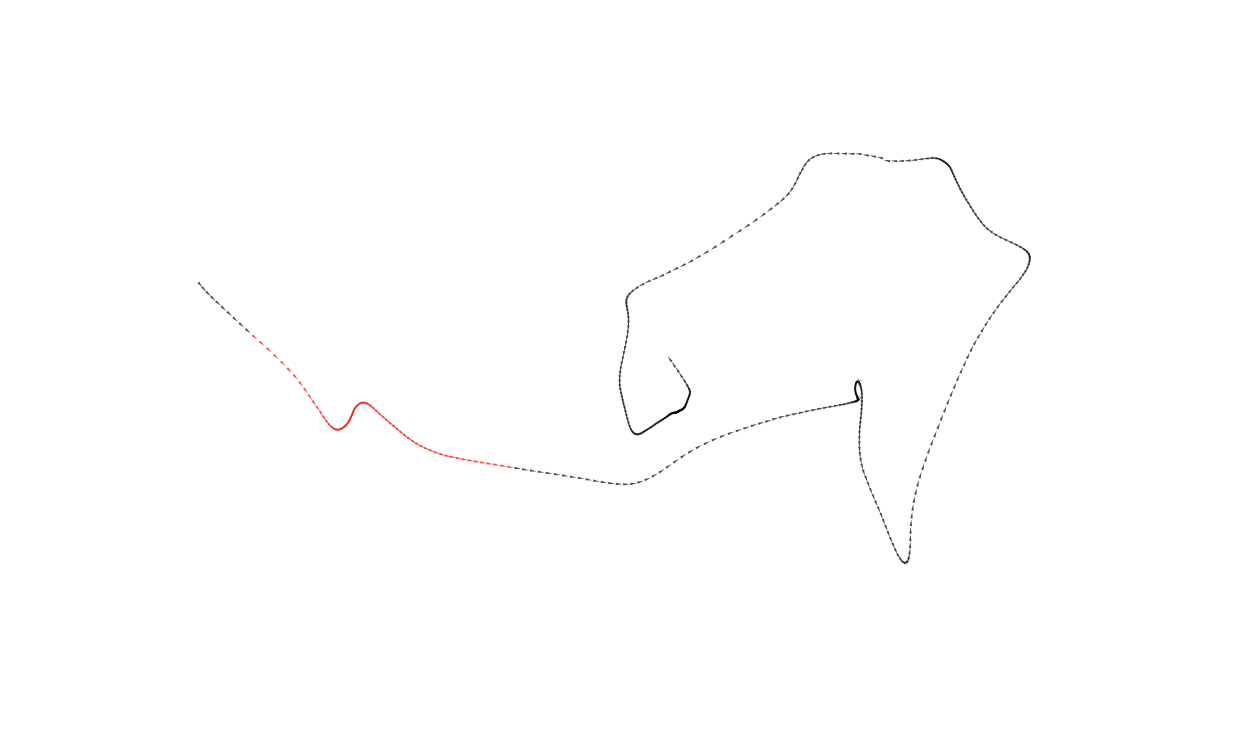

In [290]:
cmap_pulse = ListedColormap(np.array([[0.0, 0.0, 0.0], [1.0, 0.0, 0.0]]))

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=300)
ff.plot_trajectory(traj.position_x.values,
                   traj.position_y.values,
                   traj.phi.values,
                   traj.pulse.values,
                   colormap=cmap_pulse,
                   ax=ax, size_radius=0.004, nskip=0, alpha=0.7)

fifi.mpl_functions.adjust_spines(ax, [])

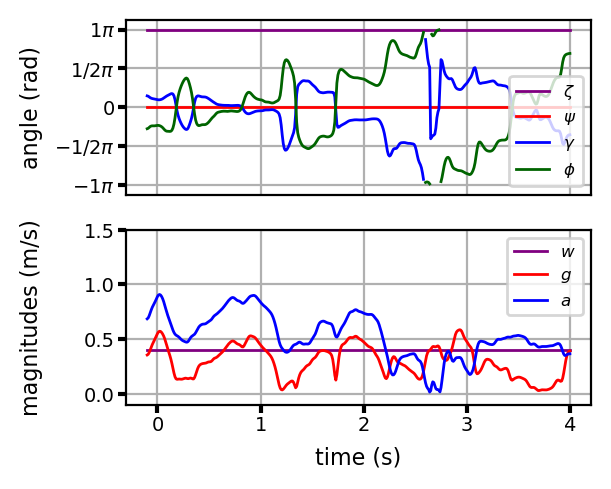

In [291]:
fig, ax = plt.subplots(2, 1, figsize=(3, 2.5), dpi=200)

ax[0].plot(*ff.circplot(traj.time, traj.zeta), label='$\zeta$', linewidth=1.0, color='purple')
ax[0].plot(*ff.circplot(traj.time, traj.psi), label='$\psi$', linewidth=1.0, color='red')
ax[0].plot(*ff.circplot(traj.time, traj.gamma), label='$\gamma$', linewidth=1.0, color='blue')
ax[0].plot(*ff.circplot(traj.time, traj.phi), label='$\phi$', linewidth=1.0, color='darkgreen')

ax[1].plot(traj.time, traj.w, label='$w$', linewidth=1.0, color='purple')
ax[1].plot(traj.time, traj.g, label='$g$', linewidth=1.0, color='red')
ax[1].plot(traj.time, traj.a, label='$a$', linewidth=1.0, color='blue')

ff.pi_yaxis(ax[0])
ax[0].set_ylabel('angle (rad)', fontsize=8)
ax[0].legend(fontsize=6)

ax[1].set_ylim(-0.1, 1.5)
ax[1].set_ylabel('magnitudes (m/s)', fontsize=8)
ax[1].legend(fontsize=6)

ax[1].set_xlabel('time (s)', fontsize=8)

for a in ax:
    a.grid()
    a.tick_params(axis='both', which='major', labelsize=7, pad=1.0, width=1.5, length=3, left=True, bottom=True)
 
ax[0].tick_params(axis='x', labelbottom=False, bottom=False)   
fig.align_ylabels(ax)

# Save

In [294]:
# Concatenate data into one data-frame to store as .csv
processed_traj_all = pd.concat(processed_traj, axis=0, ignore_index=True).reset_index(drop=True)
processed_traj_all

,ID,time,pulse,w,zeta,position_x,position_y,position_z,velocity_x,velocity_y,...,psi,v_para,v_perp,a_para,a_perp,a,gamma,gdot,phidot,phi2dot
0,0,-0.10,False,0.4,3.141593,0.000000,0.000000,0.000000,0.056356,-0.103143,...,0.0,0.117536,0.0,0.309329,0.351020,0.467867,0.848450,-0.438153,3.997432,289.355905
1,0,-0.09,False,0.4,3.141593,0.000531,-0.001072,-0.000955,0.058260,-0.097017,...,0.0,0.113166,0.0,0.319094,0.342919,0.468417,0.821371,-0.697056,6.817545,244.304471
2,0,-0.08,False,0.4,3.141593,0.001164,-0.001968,-0.001938,0.061578,-0.083304,...,0.0,0.103592,0.0,0.341362,0.321661,0.469035,0.755693,-0.956995,8.878587,-107.370041
3,0,-0.07,False,0.4,3.141593,0.001811,-0.002656,-0.003025,0.061877,-0.070799,...,0.0,0.094028,0.0,0.357255,0.301183,0.467271,0.700444,-0.889952,4.675464,-553.038289
4,0,-0.06,False,0.4,3.141593,0.002397,-0.003340,-0.004062,0.057223,-0.063921,...,0.0,0.085792,0.0,0.352590,0.298026,0.461669,0.701729,-0.770006,-2.187861,-614.491847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50137,121,3.96,False,0.4,3.141593,0.094042,0.003425,-0.170928,0.111780,0.405884,...,0.0,0.420995,0.0,0.527201,-0.385643,0.653193,-0.631550,0.999351,15.228659,114.064928
50138,121,3.97,False,0.4,3.141593,0.094833,0.007639,-0.170034,0.048046,0.430356,...,0.0,0.433030,0.0,0.477411,-0.397530,0.621250,-0.694352,1.186321,15.467288,-86.764825
50139,121,3.98,False,0.4,3.141593,0.094995,0.012080,-0.169171,-0.017960,0.444290,...,0.0,0.444653,0.0,0.428496,-0.399674,0.585959,-0.750609,1.040266,13.483731,-363.181453
50140,121,3.99,False,0.4,3.141593,0.094644,0.016554,-0.168002,-0.071713,0.448215,...,0.0,0.453916,0.0,0.390721,-0.394977,0.555580,-0.790814,0.663549,8.214859,-448.157870


In [295]:
save_path = os.path.join(os.path.pardir, 'data', 'processed', data_name + '.csv')
save_path

'..\\data\\processed\\laminar_orco_flash.csv'

In [298]:
# Save
processed_traj_all.to_csv(path_or_buf=save_path, index_label=False)

In [299]:
# Reload to make sure saved correctly
test = pd.read_csv(save_path)
test

,ID,time,pulse,w,zeta,position_x,position_y,position_z,velocity_x,velocity_y,...,psi,v_para,v_perp,a_para,a_perp,a,gamma,gdot,phidot,phi2dot
0,0,-0.10,False,0.4,3.141593,0.000000,0.000000,0.000000,0.056356,-0.103143,...,0.0,0.117536,0.0,0.309329,0.351020,0.467867,0.848450,-0.438153,3.997432,289.355905
1,0,-0.09,False,0.4,3.141593,0.000531,-0.001072,-0.000955,0.058260,-0.097017,...,0.0,0.113166,0.0,0.319094,0.342919,0.468417,0.821371,-0.697056,6.817545,244.304471
2,0,-0.08,False,0.4,3.141593,0.001164,-0.001968,-0.001938,0.061578,-0.083304,...,0.0,0.103592,0.0,0.341362,0.321661,0.469035,0.755693,-0.956995,8.878587,-107.370041
3,0,-0.07,False,0.4,3.141593,0.001811,-0.002656,-0.003025,0.061877,-0.070799,...,0.0,0.094028,0.0,0.357255,0.301183,0.467271,0.700444,-0.889952,4.675464,-553.038289
4,0,-0.06,False,0.4,3.141593,0.002397,-0.003340,-0.004062,0.057223,-0.063921,...,0.0,0.085792,0.0,0.352590,0.298026,0.461669,0.701729,-0.770006,-2.187861,-614.491847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50137,121,3.96,False,0.4,3.141593,0.094042,0.003425,-0.170928,0.111780,0.405884,...,0.0,0.420995,0.0,0.527201,-0.385643,0.653193,-0.631550,0.999351,15.228659,114.064928
50138,121,3.97,False,0.4,3.141593,0.094833,0.007639,-0.170034,0.048046,0.430356,...,0.0,0.433030,0.0,0.477411,-0.397530,0.621250,-0.694352,1.186321,15.467288,-86.764825
50139,121,3.98,False,0.4,3.141593,0.094995,0.012080,-0.169171,-0.017960,0.444290,...,0.0,0.444653,0.0,0.428496,-0.399674,0.585959,-0.750609,1.040266,13.483731,-363.181453
50140,121,3.99,False,0.4,3.141593,0.094644,0.016554,-0.168002,-0.071713,0.448215,...,0.0,0.453916,0.0,0.390721,-0.394977,0.555580,-0.790814,0.663549,8.214859,-448.157870
